### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [179]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [180]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


#### Trip duration

- What is the total travel time for users in different cities?
- What is the average travel time for users in different cities?
- What is the travel time for different user types?

In [229]:
# I loop over the dataframes of the three cities and print the summary of the Trip.Duration column
# I got how to loop over dataframes from the following stackoverflow question
# - https://stackoverflow.com/questions/19460120/looping-through-list-of-data-frames-in-r
# I studied the details of the print function at
# - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/print

city = c('Chicago', 'New York', 'Washington')
c = 0
for (i in list(chi, ny, wash)){
    c = c+1
    print(city[c])
    valid_trips = subset(i$Trip.Duration/60, !is.na(i$Trip.Duration))
    print(summary(valid_trips), digits=2)
}

[1] "Chicago"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     6.6    11.2    15.6    18.6  1423.5 
[1] "New York"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     6.1    10.2    15.1    17.5 18143.9 
[1] "Washington"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     6.8    11.8    20.6    20.6 15076.5 


As we see the trip duration for the median trip (the one having half of the trips below it and the other half above) is similar in the three citiea at around 11 minutes. 

The average trip is however longer, including the weight of very long trips (the longest trip is ine in New York at 18143/60 = 302 hours = 12 days). The average trip is longer in Washington at 20.6 minutes against ~15 minutes in Chicago and New York.

This big difference in trip times makes me think that this depends on whether the User is a customer or a subscriber. Out of curiosity I explore this division in the next cell using the `by` function:

In [238]:
city = c('Chicago', 'New York', 'Washington')
c = 0
for (i in list(chi, ny, wash)){
    c = c+1
    print(city[c])
    valid_trips = subset(i$Trip.Duration/60, !is.na(i$Trip.Duration) & i$User.Type!='')
    users = subset(i$User.Type, !is.na(i$Trip.Duration) & i$User.Type!='')
    print(by(valid_trips, users, summary), digits=2)
}

[1] "Chicago"
users: 
NULL
------------------------------------------------------------ 
users: Customer
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.1    15.3    22.8    32.2    32.2  1423.5 
------------------------------------------------------------ 
users: Subscriber
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     5.9     9.4    11.4    15.0   360.6 
[1] "New York"
users: 
NULL
------------------------------------------------------------ 
users: Customer
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      14      22      37      29   18144 
------------------------------------------------------------ 
users: Subscriber
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     5.8     9.4    12.6    15.6  1844.1 
[1] "Washington"
users: 
NULL
------------------------------------------------------------ 
users: Customer
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      16      25      44      46   15077 
-------------------------------

Customers show remarkable higher times on trip duration than subscribers. For instead, we have averages of:

- 32 vs 11 in Chicago
- 37 vs 13 in New York
- 44 vs 12 in Washington


In [239]:
library(ggplot2)

In [240]:
# Function to put together a dataframe with a column from the original dataset and
# another column containing the city name.
# The three new data frames will be conbined into one using the rbind function in order to plot
# the three cities together.
# Tips taken from these stackoverflow questions:
# https://stackoverflow.com/questions/29517072/add-column-to-dataframe-with-default-value
# https://stackoverflow.com/questions/11106964/rename-the-columns-name-after-cbind-the-data

two_col_df = function(Column, Col.Name,  City.Name){
    new_df = data.frame(Column, City.Name, stringsAsFactors = FALSE)
    names(new_df) = c(Col.Name, 'City')
    return(new_df)
}

In [241]:
# I use the previous function to create to data frames comprising trip duration and user type for the three cities
# Then I combine them in one table with the `cbind` function. While this could have been done in a single function, 
# the simpler two_col_df function is general enough to be re-used in Question 2 

trips = rbind(two_col_df(chi$Trip.Duration, 'Trip.Duration', 'Chicago'),
              two_col_df(ny$Trip.Duration, 'Trip.Duration', 'New York'), 
              two_col_df(wash$Trip.Duration, 'Trip.Duration', 'Washington'))
users = rbind(two_col_df(chi$User.Type, 'User.Type', 'Chicago'),
              two_col_df(ny$User.Type, 'User.Type', 'New York'), 
              two_col_df(wash$User.Type, 'User.Type', 'Washington'))

trips = cbind(trips, 'User.Type'=users[,1])

Warning message:
“Removed 15576 rows containing non-finite values (stat_boxplot).”

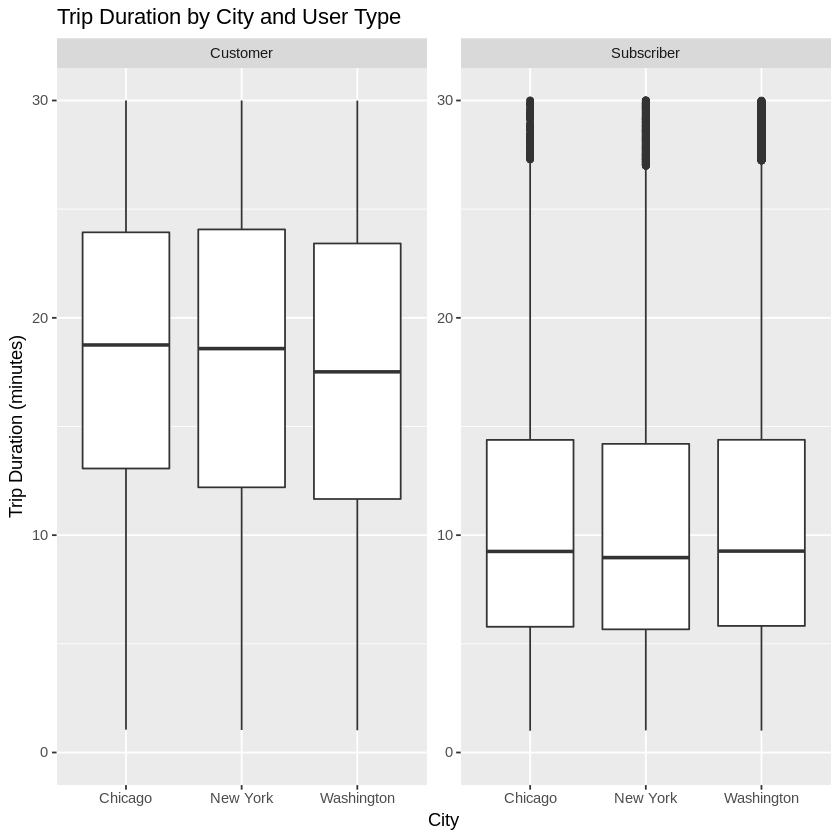

In [242]:
qplot(x=City, y=Trip.Duration/60,
    data=subset(trips, User.Type!=''),
    geom='boxplot',
    ylim=c(0,30),
    ylab='Trip Duration (minutes)',
    main='Trip Duration by City and User Type') +
    facet_wrap(~User.Type, scales = "free") 

**Summary question 1 results**

I have first explored the data on trips durations by the summary table. The big spread in trip times led me to explore the dependence to user type.

Contrary to what I first thought, occasional customers have longer trip times than subscribers. This probably indicates subscribers using the service frequently for their daily commute, while one-time customers tend to use  it on longer leisure trips. 

### Question 2

#### Popular times of travel (i.e., occurs most often in the start time)

- What is the most common month?
- What is the most common day of week?
- What is the most common hour of day?


In [243]:
# Functions to extract month, day, and hour from the Start.Time of each table
# I learned the substring command from this stack overflow question
# - https://stackoverflow.com/questions/36568070/extract-year-from-date
# The weekdays function and ordering the days on the x axis to avoid 
# alphabetical order was taken from these posts:
# - https://stackoverflow.com/questions/9216138/find-the-day-of-a-week
# - https://sebastiansauer.github.io/ordering-bars/

month = function(df){
    return(substring(df$Start.Time,6,7))
}

day = function(df){
    return(substring(df$Start.Time, 9,10))
}

hour = function(df){
    return(substring(df$Start.Time, 12,13))
}

weekday = function(df){
    return(factor(weekdays(as.Date(df$Start.Time)), 
                 levels = c('Monday', 'Tuesday', 'Wednesday',
                            'Thursday', 'Friday', 'Saturday', 'Sunday')))
}

In [244]:
# https://stackoverflow.com/questions/1923273/counting-the-number-of-elements-with-the-values-of-x-in-a-vector
# https://www.guru99.com/r-data-frames.html
count_table = function(var, var.Name, City.Name){
    var_count = data.frame(table(var))
    names(var_count) = c(var.Name, City.Name)
    var_count = subset(var_count, subset = var_count[1] != '')  # Spurious data cleaning
    return(var_count)
}

months_table = cbind(count_table(month(chi), 'Month', 'Chicago'), 
                      'New.York'=count_table(month(ny), 'Month', 'New.York')[,2], 
                      'Washington'=count_table(month(wash), 'Month', 'Washington')[,2])
months_table

weekday_table = cbind(count_table(weekday(chi), 'Weekday', 'Chicago'), 
                      'New.York'=count_table(weekday(ny), 'Weekday', 'New.York')[,2], 
                      'Washington'=count_table(weekday(wash), 'Weekday', 'Washington')[,2])
weekday_table

hour_table = cbind(count_table(hour(chi), 'Hour', 'Chicago'), 
                      'New.York'=count_table(hour(ny), 'Hour', 'New.York')[,2], 
                      'Washington'=count_table(hour(wash), 'Hour', 'Washington')[,2])
hour_table

Month,Chicago,New.York,Washington
01,650,5745,8946
02,930,6364,11563
03,803,5820,12612
04,1526,10661,18522
05,1905,12180,17072
06,2816,14000,20335


Weekday,Chicago,New.York,Washington
Monday,1302,7570,11721
Tuesday,1292,7898,13288
Wednesday,1236,9632,14212
Thursday,1254,8729,13204
Friday,1285,8168,12926
Saturday,1150,6176,12133
Sunday,1111,6597,11566


Hour,Chicago,New.York,Washington
00,55,436,227
01,26,231,3500
02,18,152,3421
03,16,60,3655
04,17,84,4541
05,67,312,6741
06,243,1212,6994
07,560,2512,8490
08,693,4337,9805
09,385,3521,5957


In [245]:
# I use here the previously defined two_col_df function to set together tables connecting month,
# weekdays, and hour with the respective city
# Tips taken from these stackoverflow questions
# https://stackoverflow.com/questions/29517072/add-column-to-dataframe-with-default-value
# https://stackoverflow.com/questions/11106964/rename-the-columns-name-after-cbind-the-data

month_df = rbind(two_col_df(as.integer(month(chi)), 'Month', 'Chicago'),
              two_col_df(as.integer(month(ny)), 'Month', 'New York'), 
              two_col_df(as.integer(month(wash)), 'Month', 'Washington'))

weekday_df = rbind(two_col_df(weekday(chi), 'Weekday', 'Chicago'),
              two_col_df(weekday(ny), 'Weekday', 'New York'), 
              two_col_df(weekday(wash), 'Weekday', 'Washington'))

hour_df = rbind(two_col_df(hour(chi), 'Hour', 'Chicago'),
              two_col_df(hour(ny), 'Hour', 'New York'), 
              two_col_df(hour(wash), 'Hour', 'Washington'))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

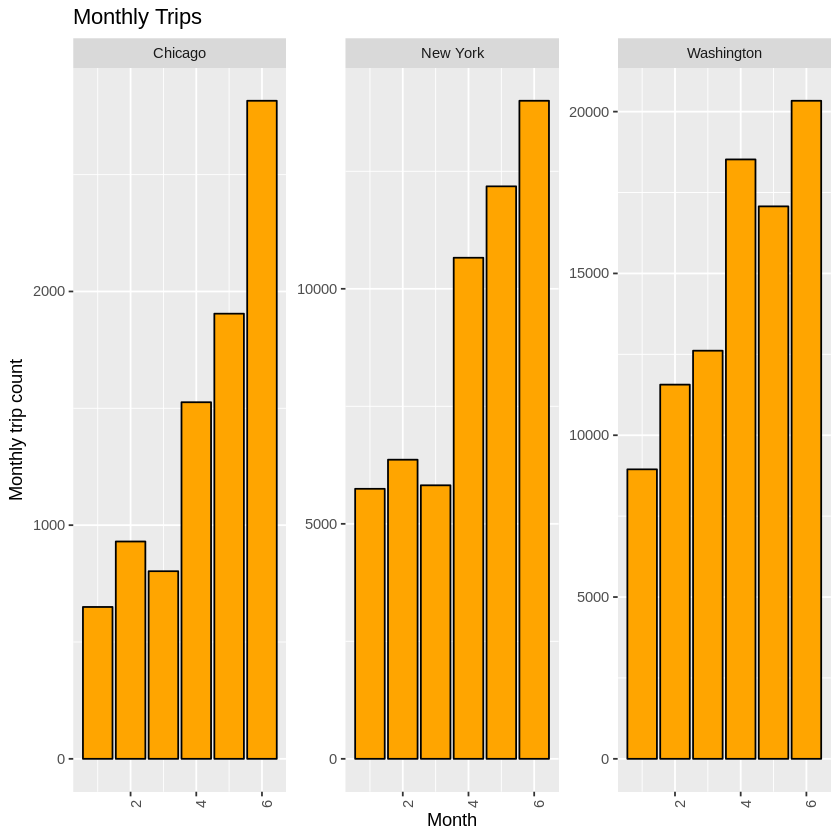

In [246]:
# I changed geom_histogram parameter to stat='count' as prompted by error message
# https://stackoverflow.com/questions/18046051/setting-individual-axis-limits-with-facet-wrap-and-scales-free-in-ggplot2
# https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2

ggplot(data = month_df, aes(x = Month)) +
    geom_histogram(stat="count", color='black', fill='orange') +
    facet_wrap(~City, scales = "free") +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle('Monthly Trips') +
    ylab('Monthly trip count')

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

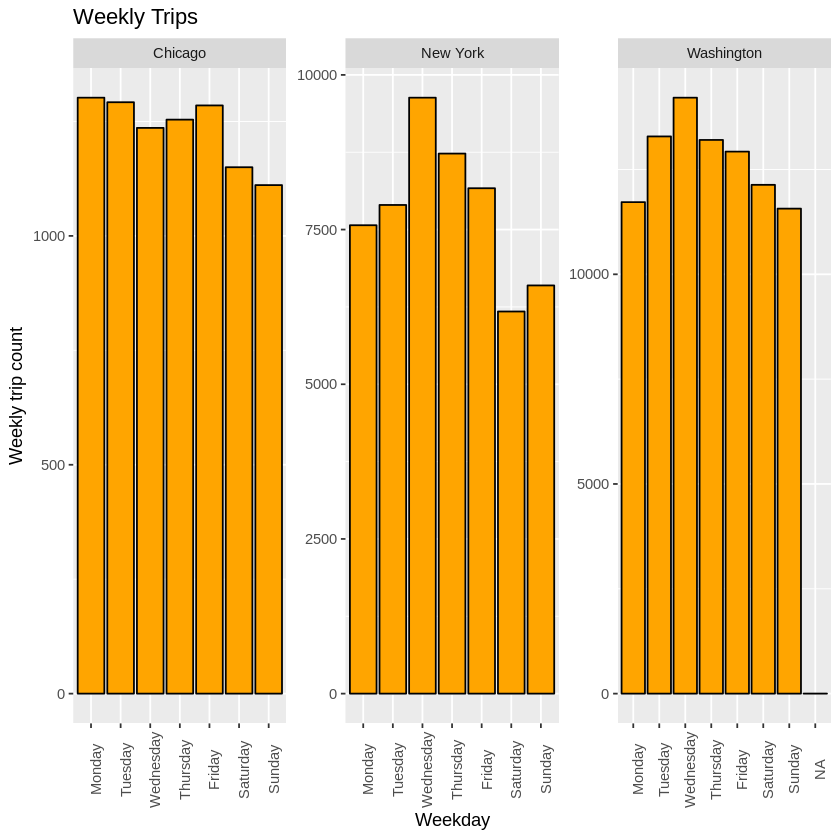

In [247]:
ggplot(data = weekday_df, aes(x = Weekday)) +
    geom_histogram(stat="count", color='black', fill='orange') +
    facet_wrap(~City, scales = "free") +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle('Weekly Trips') +
    ylab('Weekly trip count')

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

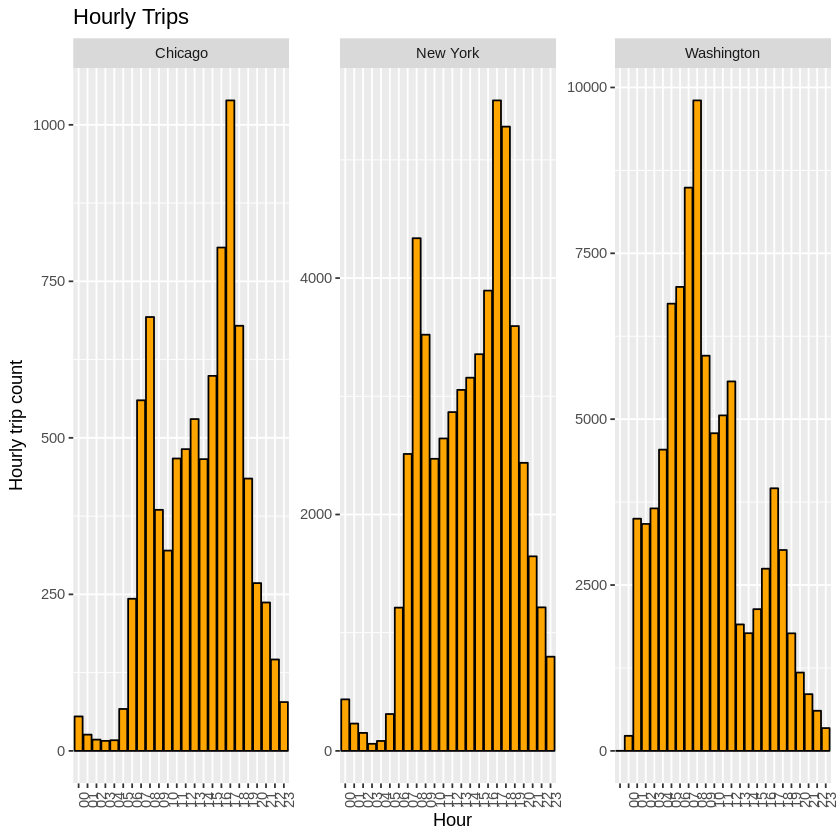

In [248]:
ggplot(data = hour_df, aes(x = Hour)) +
    geom_histogram(stat="count", color='black', fill='orange') +
    facet_wrap(~City, scales = "free") +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle('Hourly Trips') +
    ylab('Hourly trip count') 

**Summary question 2 results**

Popular times of travel where explored. First the summary tables shown the number of trips made for each month, weekday, and hour of the day. The most relevant features like a reduction of trips on weekend or at night hour is observable from the tables.

However, the graphs convey more clearly the data and the comparison between cities can be more clearly made.

On monthly trip, we can observe a steady increase on use from January to June, being June the most used month in our three cities. An explanation to these data would be an existing bikeshare service that is more used in the spring months than on winter. It is interesting to note that the difference between use in winter and spring months is stronger in Chicago and New York than in Washington. This makes sense being the winter climate harsher in Chicago and New York than in Washington.

On weekly trip, we see a lower use of the service on weekends, specially at Chicago and New York. This indicates that the service is quite used for work commutes in these cities. At Washington the service is lower on the weekends, but still at the level of Monday use. This may again be related to a milder climate and higher use of the service for pleasure.

Hourly trips data reveal two peak hours at the morning and at the evening. This corresponds to work entry and leave times. Again, Chicago and New York are similar in that the evening peak time is bigger than the morning peak time, while in Washington is the other way around. This may be relate to a higher proportion of jobs being on the public sector in Washington.


### Question 3

#### Popular stations and trips

- What is the most common trip from start to end (i.e., most frequent combination of start station and end station)?

In [249]:
# Code tips taken from the folowing posts:
# - https://stackoverflow.com/questions/7201341/how-can-two-strings-be-concatenated
# - https://stackoverflow.com/questions/51819030/find-top-10-values-in-a-table-in-r

common_stations_summary = function(df, City.Name){
    Start.to.End = paste(df$Start.Station, df$End.Station, sep="\n -> ") 
    trips = data.frame(sort(table(Start.to.End), decreasing = TRUE)[1:5])
    names(trips) = c(paste('Most_common_', City.Name, '_trips', sep=''), 'Count')
    return(trips)
}

chi_trips = common_stations_summary(chi, 'Chicago')
ny_trips = common_stations_summary(ny, 'New.York')
wash_trips = common_stations_summary(wash, 'Washington')

chi_trips
ny_trips
wash_trips

Most_common_Chicago_trips,Count
Lake Shore Dr & Monroe St -> Streeter Dr & Grand Ave,32
Streeter Dr & Grand Ave -> Streeter Dr & Grand Ave,32
Streeter Dr & Grand Ave -> Lake Shore Dr & North Blvd,23
Lake Shore Dr & North Blvd -> Streeter Dr & Grand Ave,17
Streeter Dr & Grand Ave -> Theater on the Lake,17


Most_common_New.York_trips,Count
E 7 St & Avenue A -> Cooper Square & E 7 St,33
Central Park S & 6 Ave -> Central Park S & 6 Ave,31
Centre St & Chambers St -> Centre St & Chambers St,24
Pershing Square North -> W 33 St & 7 Ave,24
Pershing Square North -> Broadway & W 32 St,20


Most_common_Washington_trips,Count
Jefferson Dr & 14th St SW -> Jefferson Dr & 14th St SW,198
Smithsonian-National Mall / Jefferson Dr & 12th St SW -> Smithsonian-National Mall / Jefferson Dr & 12th St SW,192
Lincoln Memorial -> Jefferson Dr & 14th St SW,143
Lincoln Memorial -> Jefferson Memorial,143
Jefferson Dr & 14th St SW -> Lincoln Memorial,138


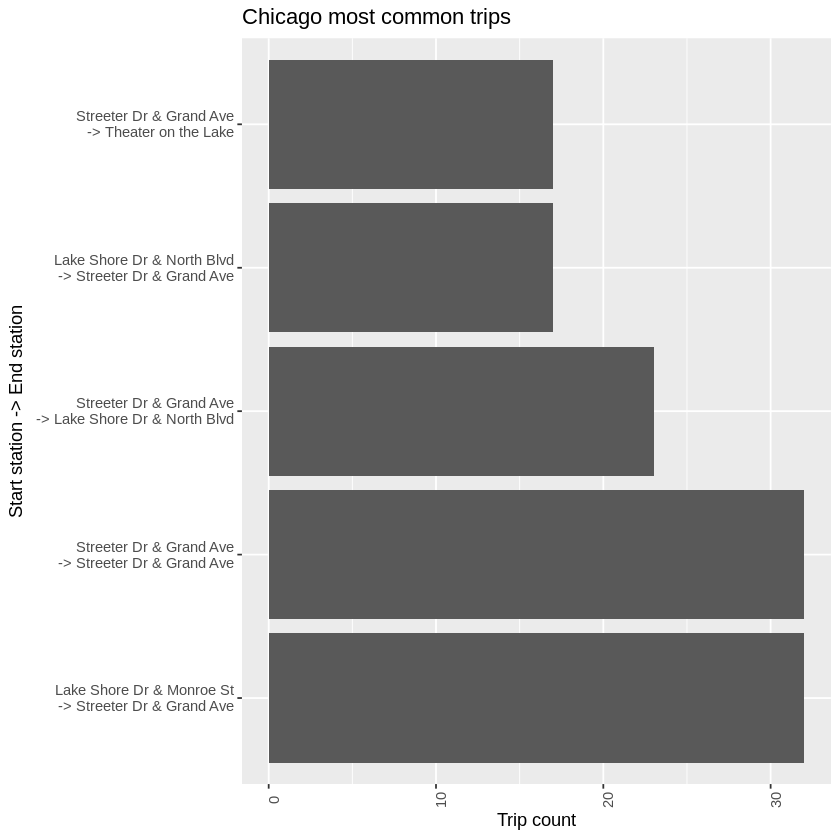

In [250]:
ggplot(data=chi_trips, aes(x=Most_common_Chicago_trips, y=Count)) +
    geom_bar(stat="identity") +
    theme(axis.text.x = element_text(angle = 90)) + 
    coord_flip() +
    ggtitle('Chicago most common trips') +
    xlab('Start station -> End station') +
    ylab('Trip count')

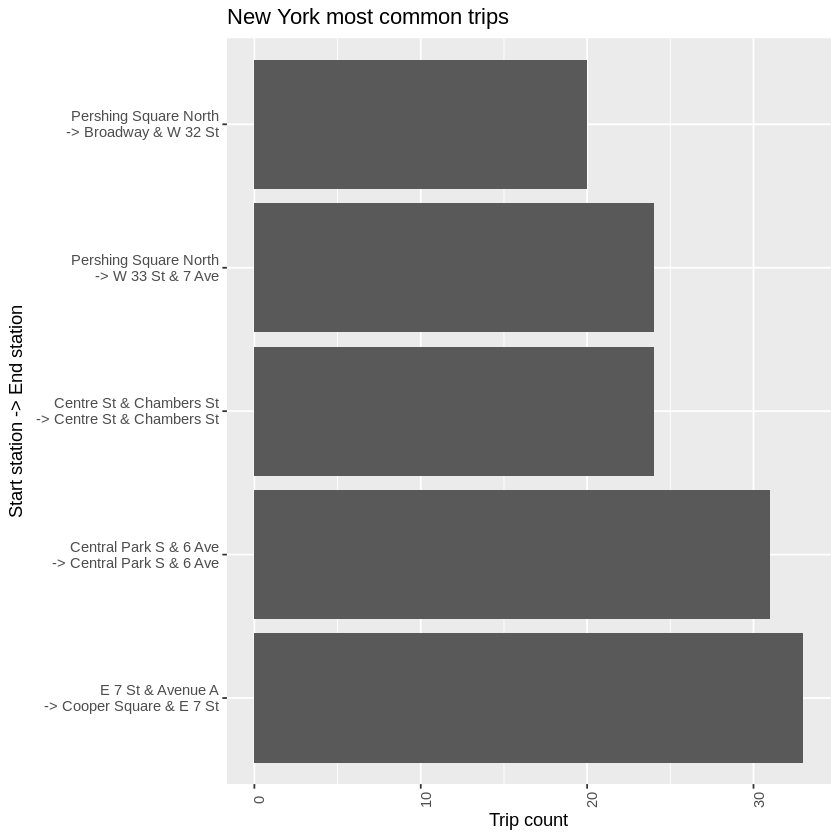

In [251]:
ggplot(data=ny_trips, aes(x=Most_common_New.York_trips, y=Count)) +
    geom_bar(stat="identity") +
    theme(axis.text.x = element_text(angle = 90)) + 
    coord_flip() +
    ggtitle('New York most common trips') +
    xlab('Start station -> End station') +
    ylab('Trip count')

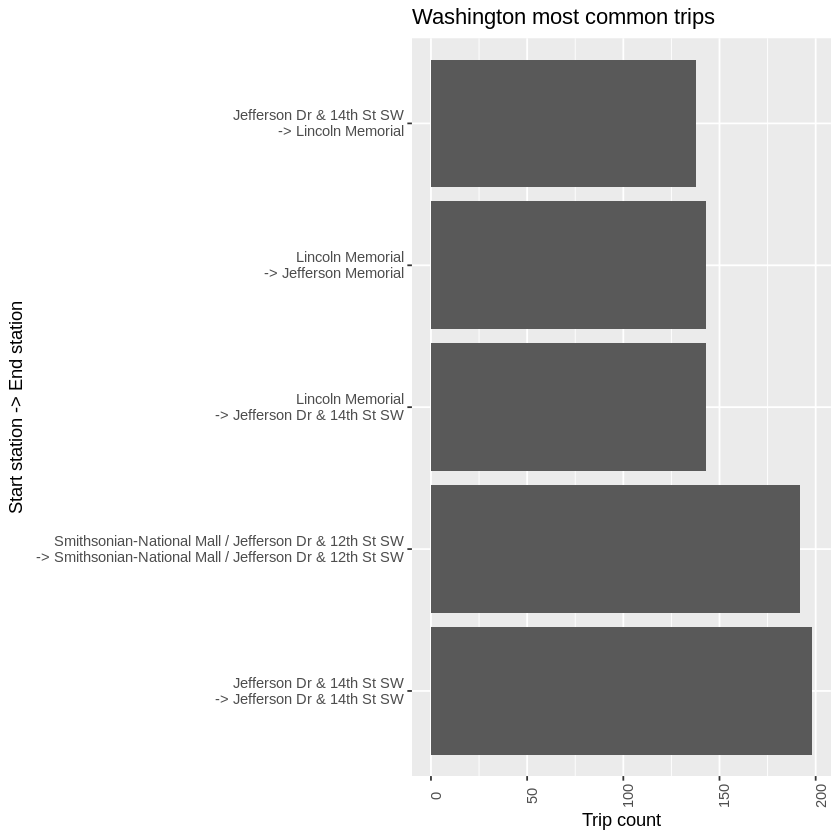

In [252]:
ggplot(data=wash_trips, aes(x=Most_common_Washington_trips, y=Count)) +
    geom_bar(stat="identity") +
    theme(axis.text.x = element_text(angle = 90)) + 
    coord_flip() +
    ggtitle('Washington most common trips') +
    xlab('Start station -> End station') +
    ylab('Trip count')

**Summary of question 3 results.**

Tables of the most common trip as combination between start station and end station were created using the `paste` function to concatenate strings, and the `table` fuction to count each occurrence. The top 5 most common trips were filtered and plotted in a bar graph.

The central stations are predictably well represented in the most common trips and, frequently, the same popular station is both the start and end station of the trip. 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [253]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')